<a href="https://colab.research.google.com/github/dharalakshmi/Titanic-Survival-Prediction/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

import nltk

nltk.download('all')
df = pd.read_csv("/mnt/Titanic-Dataset.csv")
df

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
import pandas as pd

df = pd.read_csv("/mnt/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd

df = pd.read_csv("/mnt/Titanic-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import pandas as pd

df = pd.read_csv("/mnt/Titanic-Dataset.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import pandas as pd

df = pd.read_csv("/mnt/Titanic-Dataset.csv")
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


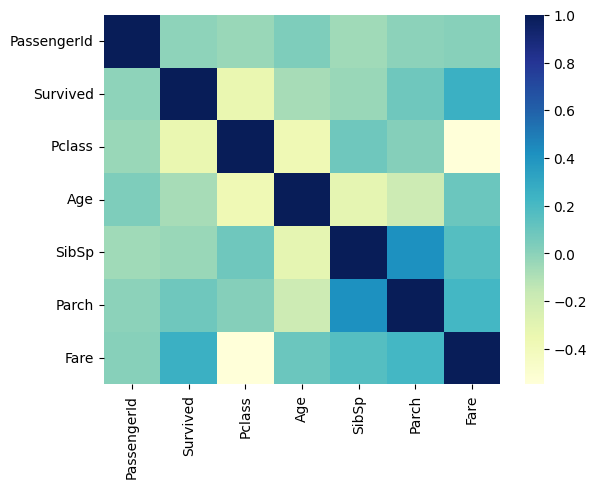

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

numerical_df = df.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

# look at numeric and categorzcal values separately
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

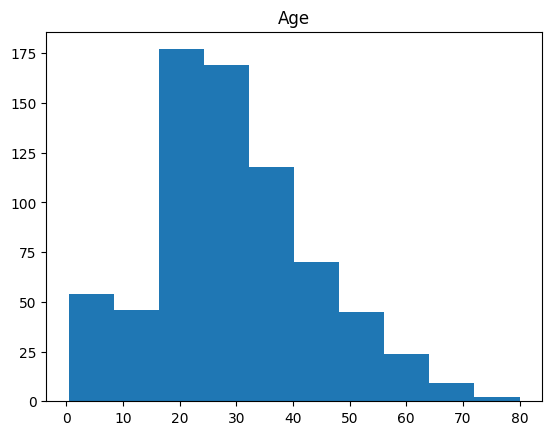

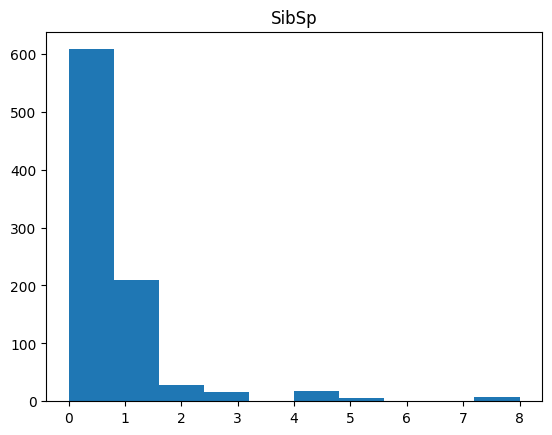

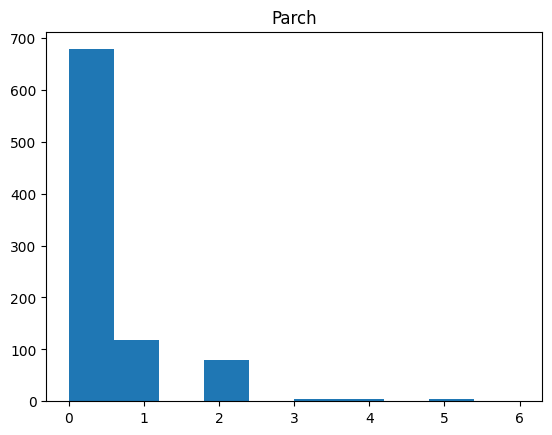

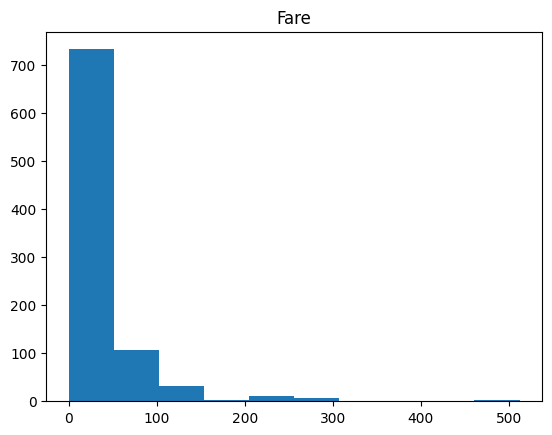

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

# distributions for an numeric variables
for i in df_num.columns:
    plt.hist(df_num[i]) # Indented this line
    plt.title(i)        # Indented this line
    plt.show()          # Indented this line and corrected typo (Show -> show)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

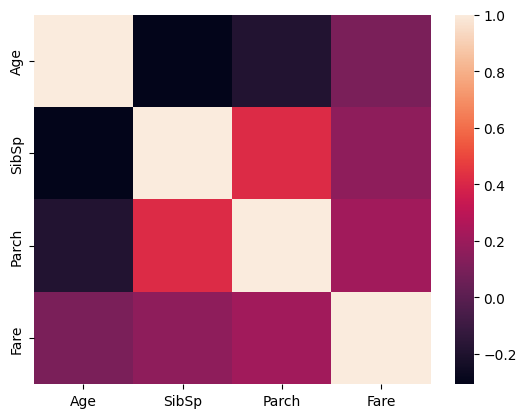

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

print(df_num.corr())
sns.heatmap(df_num.corr())

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(df, index='Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


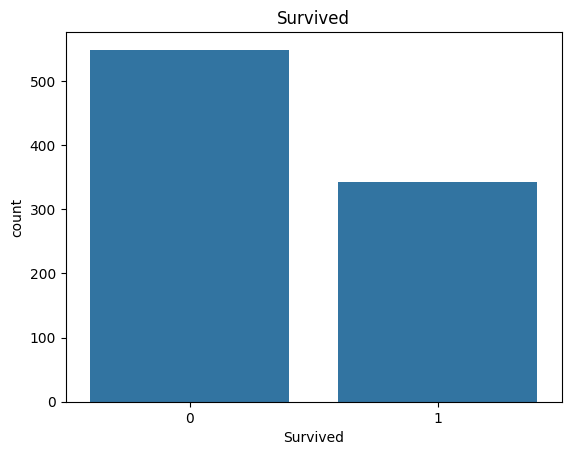

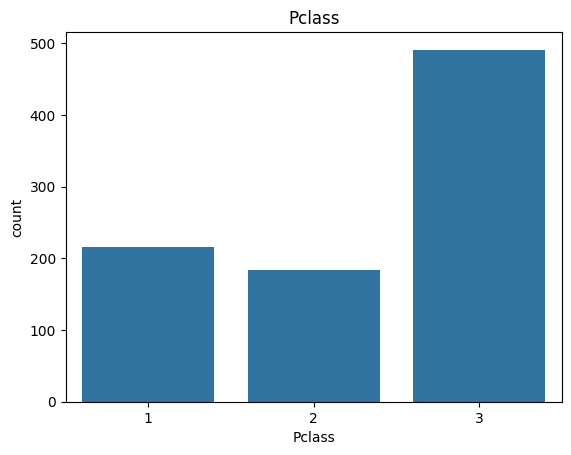

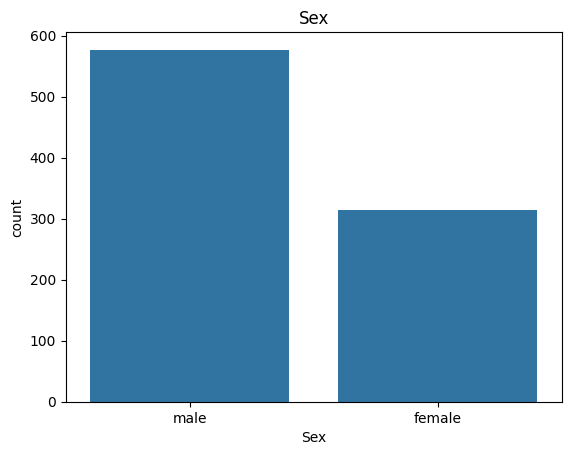

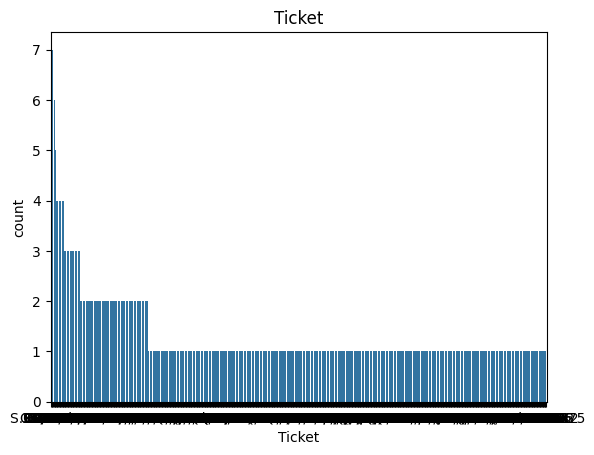

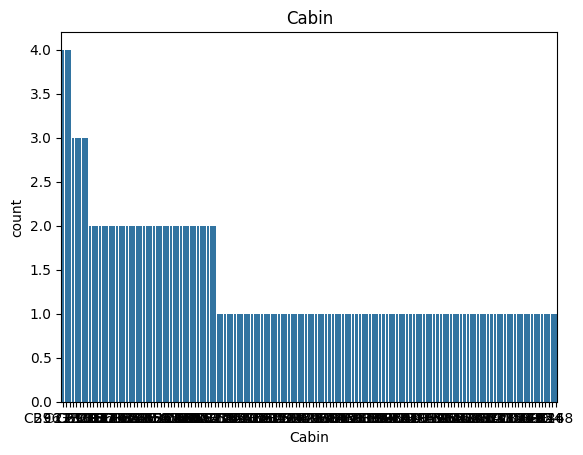

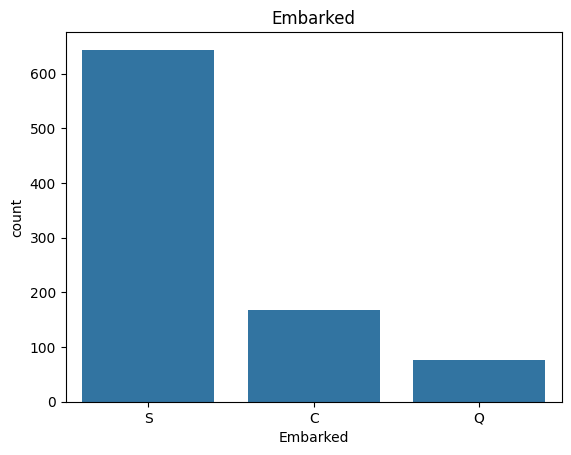

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

for i in df_cat.columns:
  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i) # Pass x and y as named arguments
  plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

# Comparing survival and each of these
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Added import for matplotlib.pyplot

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

df['cabin_multiple'].value_counts()

,count
cabin_multiple,
0,687
1,180
2,16
3,6
4,2


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_multiple'].value_counts()

pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

print(df.cabin_adv.value_counts())
pd.pivot_table(df, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc = 'count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['numeric_ticket'].value_counts()

,count
numeric_ticket,
1,661
0,230


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['ticket_letters'].value_counts()

,count
ticket_letters,
0,665
pc,60
ca,41
a5,21
stono2,18
sotonoq,15
scparis,11
wc,10
a4,7


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)

pd.pivot_table(df, index='Survived', columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)

pd.pivot_table(df, index='Survived', columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()


,count
name_title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


(711,)

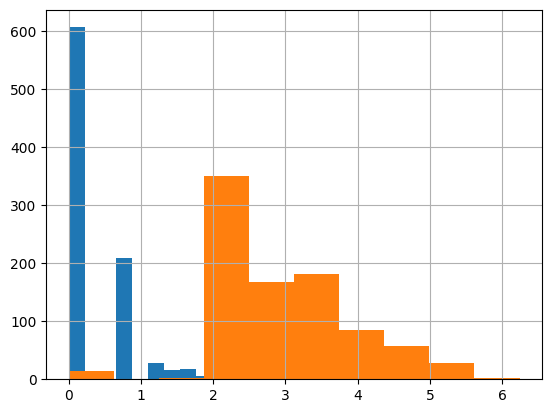

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data
#df.Age = df.Age.fillna(df.Age.mean())
df.Age = df.Age.fillna(df.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
df.Fare = df.Fare.fillna(df.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test
df.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

all_dummies = pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']]) # Removed 'train_test'

# Since you don't have a 'train_test' column, you will need to define how you want to split
# your data into training and testing sets. Here's an example using scikit-learn's train_test_split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_dummies, df['Survived'], test_size=0.2, random_state=42) # Example split, adjust parameters as needed


y_train.shape

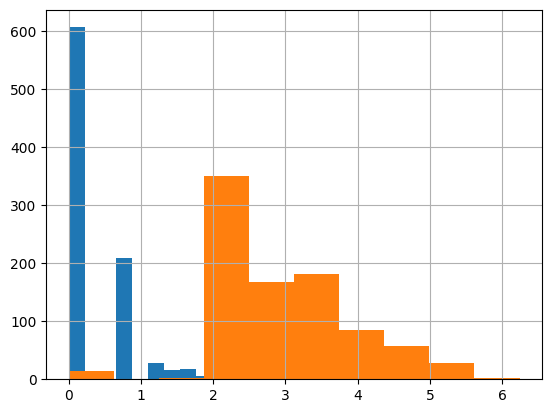

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data
#df.Age = df.Age.fillna(df.Age.mean())
df.Age = df.Age.fillna(df.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
df.Fare = df.Fare.fillna(df.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test
df.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

all_dummies = pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']]) # Removed 'train_test'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create train_test column and split data
X_train, X_test, y_train, y_test = train_test_split(all_dummies, df['Survived'], test_size=0.2, random_state=42)

# Scale the data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66433566 0.64788732 0.69014085 0.63380282 0.71126761]
0.6694868511769921


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83216783 0.81690141 0.85211268 0.84507042 0.78169014]
0.8255884960110311


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.81690141 0.85915493 0.85211268 0.78873239]
0.8284152467251058


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75524476 0.84507042 0.85211268 0.81690141 0.80985915]
0.8158376834433174


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76223776 0.84507042 0.85211268 0.81690141 0.80985915]
0.8172362848419187


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78321678 0.78169014 0.80985915 0.83098592 0.76760563]
0.7946715256574413


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78321678 0.78169014 0.80985915 0.83098592 0.76760563]
0.7946715256574413


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83216783 0.85915493 0.85915493 0.83098592 0.8028169 ]
0.8368561016448341


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83216783 0.86619718 0.85915493 0.82394366 0.80985915]
0.8382645523490595


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81118881 0.84507042 0.83098592 0.83802817 0.83098592]
0.8312518467448043


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78321678 0.86619718 0.84507042 0.84507042 0.8028169 ]
0.8284743425588497


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/mnt/Titanic-Dataset.csv")

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')

In [ ]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84615385 0.84507042 0.85915493 0.83802817 0.8028169 ]
0.8382448537378113
